In [1]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cc_ds = pd.read_csv('CC GENERAL.csv', encoding='latin1', sep=",")

cc_ds

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.options.display.float_format="{:,.2f}".format
cc_ds.sample(n=10, random_state=0)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8787,C19026,23.07,0.70,150.00,0.00,150.00,0.00,0.50,0.00,0.40,0.00,0,5,"1,500.00",229.74,116.75,1.00,10
1509,C11560,75.01,0.55,480.02,480.02,0.00,0.00,0.08,0.08,0.00,0.00,0,1,"1,950.00",485.74,86.50,0.00,12
4986,C15127,319.04,0.82,"1,262.28","1,262.28",0.00,0.00,0.25,0.25,0.00,0.00,0,6,"10,500.00","1,350.54",218.81,0.12,12
3240,C13334,182.09,1.00,"1,935.16","1,935.16",0.00,0.00,0.83,0.83,0.00,0.00,0,26,"13,500.00","2,559.79",212.12,0.42,12
5516,C15671,182.85,1.00,"1,978.87",765.85,"1,213.02",0.00,1.00,0.75,1.00,0.00,0,68,"6,000.00","1,590.33",167.14,0.75,12
8517,C18748,143.54,1.00,415.47,0.00,415.47,0.00,1.00,0.00,1.00,0.00,0,17,"3,000.00",394.51,172.57,0.00,12
2009,C12072,497.73,1.00,"1,234.50",653.00,581.50,0.00,0.58,0.33,0.42,0.00,0,14,"3,000.00",206.10,382.09,0.00,12
6428,C16604,"3,746.92",1.00,"7,468.37","1,310.10","6,158.27",0.00,1.00,0.75,1.00,0.00,0,139,"10,000.00","4,793.23",949.06,0.00,12
2103,C12169,"1,346.31",1.00,652.13,567.76,84.37,0.00,0.50,0.42,0.08,0.00,0,10,"6,000.00",385.15,275.43,0.00,12
8220,C18440,435.52,1.00,27.22,27.22,0.00,0.00,0.08,0.08,0.00,0.00,0,1,500.00,160.54,220.94,0.00,12


In [4]:
#Checking dataset info by feature

cc_ds.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#Checking the existence of zeros in rows

(cc_ds==0).sum(axis=0).to_excel("zeros_per_feature.xlsx")
(cc_ds==0).sum(axis=0)

CUST_ID                                0
BALANCE                               80
BALANCE_FREQUENCY                     80
PURCHASES                           2044
ONEOFF_PURCHASES                    4302
INSTALLMENTS_PURCHASES              3916
CASH_ADVANCE                        4628
PURCHASES_FREQUENCY                 2043
ONEOFF_PURCHASES_FREQUENCY          4302
PURCHASES_INSTALLMENTS_FREQUENCY    3915
CASH_ADVANCE_FREQUENCY              4628
CASH_ADVANCE_TRX                    4628
PURCHASES_TRX                       2044
CREDIT_LIMIT                           0
PAYMENTS                             240
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                    5903
TENURE                                 0
dtype: int64

In [6]:
#Checking the existence of duplicated rows

cc_ds.duplicated().sum()

0

In [7]:
#Checking basic statistical data by feature

cc_ds.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,"8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,950.00","8,949.00","8,950.00","8,637.00","8,950.00","8,950.00"
unique,8950,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,C14250,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,"1,564.47",0.88,"1,003.20",592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,"4,494.45","1,733.14",864.21,0.15,11.52
std,NaN,"2,081.53",0.24,"2,136.63","1,659.89",904.34,"2,097.16",0.40,0.30,0.40,0.20,6.82,24.86,"3,638.82","2,895.06","2,372.45",0.29,1.34
min,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,NaN,128.28,0.89,39.63,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,"1,600.00",383.28,169.12,0.00,12.00
50%,NaN,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,"3,000.00",856.90,312.34,0.00,12.00
75%,NaN,"2,054.14",1.00,"1,110.13",577.41,468.64,"1,113.82",0.92,0.30,0.75,0.22,4.00,17.00,"6,500.00","1,901.13",825.49,0.14,12.00


In [8]:
cc_ds["CREDIT_LIMIT"].fillna(cc_ds["CREDIT_LIMIT"].mean(), inplace=True)
cc_ds["MINIMUM_PAYMENTS"].fillna(cc_ds["MINIMUM_PAYMENTS"].mean(), inplace=True)

#2

cc_ds.loc[550, "PURCHASES"] = cc_ds["PURCHASES"].mean()
cc_ds.loc[5260, "INSTALLMENTS_PURCHASES"] = cc_ds["INSTALLMENTS_PURCHASES"].mean()
cc_ds.loc[2159, "CASH_ADVANCE"] = cc_ds["CASH_ADVANCE"].mean()
cc_ds.loc[4376, "MINIMUM_PAYMENTS"] = cc_ds["MINIMUM_PAYMENTS"].mean()

cc_ds.to_excel("cc_ds_clean.xlsx")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

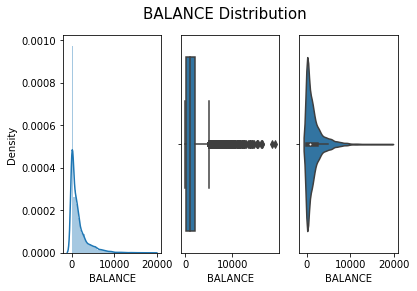

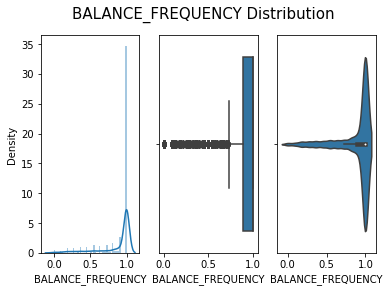

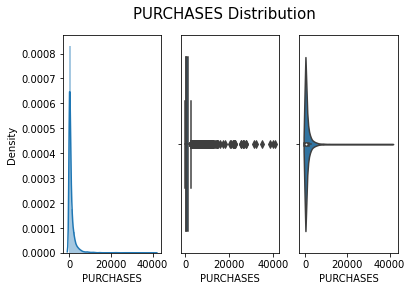

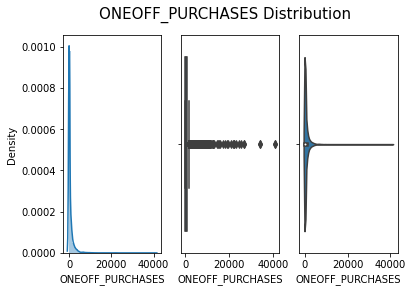

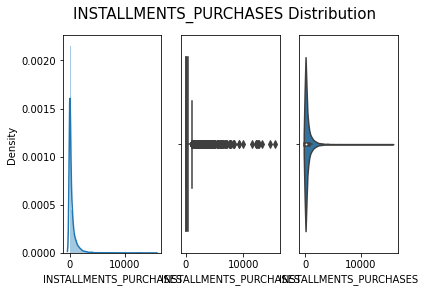

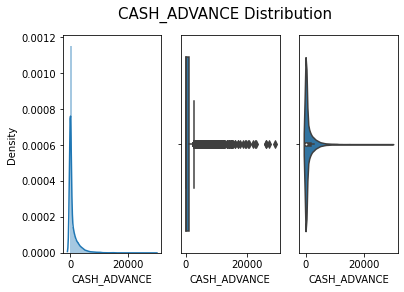

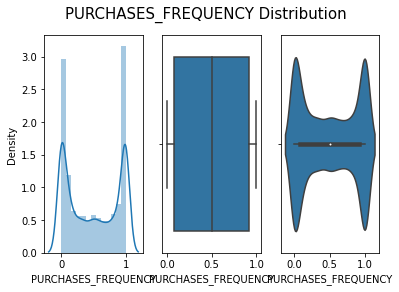

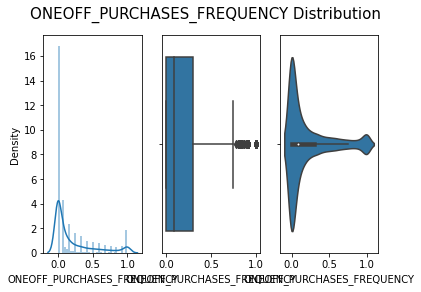

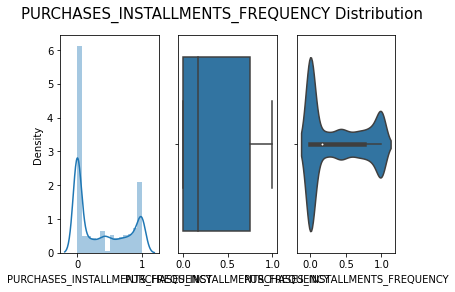

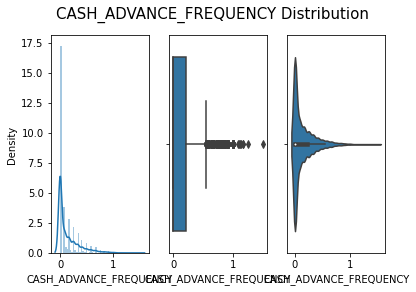

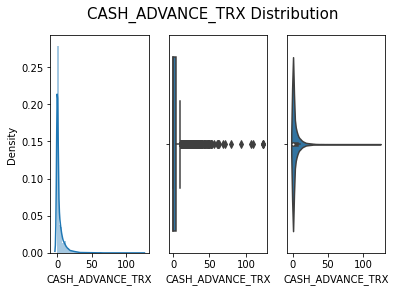

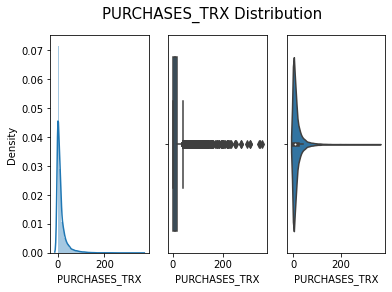

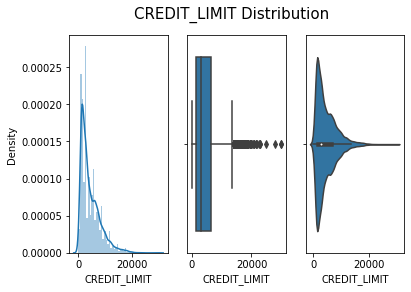

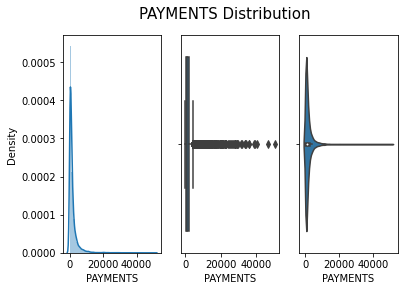

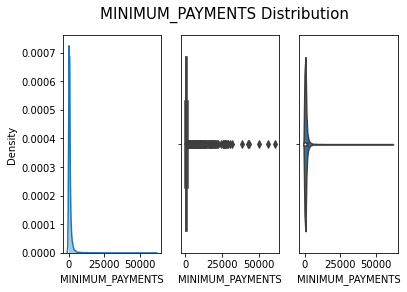

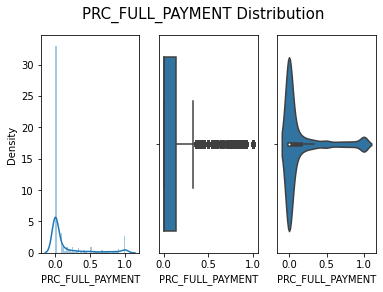

In [9]:
#Plotting Numerical Variables

fig, ax = plt.subplots(1, 3)
fig.suptitle("BALANCE Distribution", fontsize=15)
sns.distplot(cc_ds["BALANCE"], ax=ax[0])
sns.boxplot(cc_ds["BALANCE"], ax=ax[1])
sns.violinplot(cc_ds["BALANCE"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("BALANCE_FREQUENCY Distribution", fontsize=15)
sns.distplot(cc_ds["BALANCE_FREQUENCY"], ax=ax[0])
sns.boxplot(cc_ds["BALANCE_FREQUENCY"], ax=ax[1])
sns.violinplot(cc_ds["BALANCE_FREQUENCY"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("PURCHASES Distribution", fontsize=15)
sns.distplot(cc_ds["PURCHASES"], ax=ax[0])
sns.boxplot(cc_ds["PURCHASES"], ax=ax[1])
sns.violinplot(cc_ds["PURCHASES"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("ONEOFF_PURCHASES Distribution", fontsize=15)
sns.distplot(cc_ds["ONEOFF_PURCHASES"], ax=ax[0])
sns.boxplot(cc_ds["ONEOFF_PURCHASES"], ax=ax[1])
sns.violinplot(cc_ds["ONEOFF_PURCHASES"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("INSTALLMENTS_PURCHASES Distribution", fontsize=15)
sns.distplot(cc_ds["INSTALLMENTS_PURCHASES"], ax=ax[0])
sns.boxplot(cc_ds["INSTALLMENTS_PURCHASES"], ax=ax[1])
sns.violinplot(cc_ds["INSTALLMENTS_PURCHASES"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("CASH_ADVANCE Distribution", fontsize=15)
sns.distplot(cc_ds["CASH_ADVANCE"], ax=ax[0])
sns.boxplot(cc_ds["CASH_ADVANCE"], ax=ax[1])
sns.violinplot(cc_ds["CASH_ADVANCE"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("PURCHASES_FREQUENCY Distribution", fontsize=15)
sns.distplot(cc_ds["PURCHASES_FREQUENCY"], ax=ax[0])
sns.boxplot(cc_ds["PURCHASES_FREQUENCY"], ax=ax[1])
sns.violinplot(cc_ds["PURCHASES_FREQUENCY"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("ONEOFF_PURCHASES_FREQUENCY Distribution", fontsize=15)
sns.distplot(cc_ds["ONEOFF_PURCHASES_FREQUENCY"], ax=ax[0])
sns.boxplot(cc_ds["ONEOFF_PURCHASES_FREQUENCY"], ax=ax[1])
sns.violinplot(cc_ds["ONEOFF_PURCHASES_FREQUENCY"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("PURCHASES_INSTALLMENTS_FREQUENCY Distribution", fontsize=15)
sns.distplot(cc_ds["PURCHASES_INSTALLMENTS_FREQUENCY"], ax=ax[0])
sns.boxplot(cc_ds["PURCHASES_INSTALLMENTS_FREQUENCY"], ax=ax[1])
sns.violinplot(cc_ds["PURCHASES_INSTALLMENTS_FREQUENCY"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("CASH_ADVANCE_FREQUENCY Distribution", fontsize=15)
sns.distplot(cc_ds["CASH_ADVANCE_FREQUENCY"], ax=ax[0])
sns.boxplot(cc_ds["CASH_ADVANCE_FREQUENCY"], ax=ax[1])
sns.violinplot(cc_ds["CASH_ADVANCE_FREQUENCY"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("CASH_ADVANCE_TRX Distribution", fontsize=15)
sns.distplot(cc_ds["CASH_ADVANCE_TRX"], ax=ax[0])
sns.boxplot(cc_ds["CASH_ADVANCE_TRX"], ax=ax[1])
sns.violinplot(cc_ds["CASH_ADVANCE_TRX"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("PURCHASES_TRX Distribution", fontsize=15)
sns.distplot(cc_ds["PURCHASES_TRX"], ax=ax[0])
sns.boxplot(cc_ds["PURCHASES_TRX"], ax=ax[1])
sns.violinplot(cc_ds["PURCHASES_TRX"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("CREDIT_LIMIT Distribution", fontsize=15)
sns.distplot(cc_ds["CREDIT_LIMIT"], ax=ax[0])
sns.boxplot(cc_ds["CREDIT_LIMIT"], ax=ax[1])
sns.violinplot(cc_ds["CREDIT_LIMIT"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("PAYMENTS Distribution", fontsize=15)
sns.distplot(cc_ds["PAYMENTS"], ax=ax[0])
sns.boxplot(cc_ds["PAYMENTS"], ax=ax[1])
sns.violinplot(cc_ds["PAYMENTS"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("MINIMUM_PAYMENTS Distribution", fontsize=15)
sns.distplot(cc_ds["MINIMUM_PAYMENTS"], ax=ax[0])
sns.boxplot(cc_ds["MINIMUM_PAYMENTS"], ax=ax[1])
sns.violinplot(cc_ds["MINIMUM_PAYMENTS"], ax=ax[2])

fig, ax = plt.subplots(1, 3)
fig.suptitle("PRC_FULL_PAYMENT Distribution", fontsize=15)
sns.distplot(cc_ds["PRC_FULL_PAYMENT"], ax=ax[0])
sns.boxplot(cc_ds["PRC_FULL_PAYMENT"], ax=ax[1])
sns.violinplot(cc_ds["PRC_FULL_PAYMENT"], ax=ax[2])


In [10]:
#Deleting not relevant and original categorical columns

cc_ds2 = cc_ds.drop(["CUST_ID"], axis=1)

# #Plotting a Heatmap

# fig, ax = plt.subplots(1, figsize=(25,25))
# sns.heatmap(cc_ds2.corr(), annot=True, fmt=",.2f")
# plt.title("Heatmap Correlation", fontsize=20)
# plt.tick_params(labelsize=12)
# plt.xticks(rotation=90)
# plt.yticks(rotation=45)

# #Plotting a Pairplot

# sns.pairplot(cc_ds2)

In [11]:
#Defining Xs

X_orig = cc_ds
X = cc_ds2

#Scaling all features

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

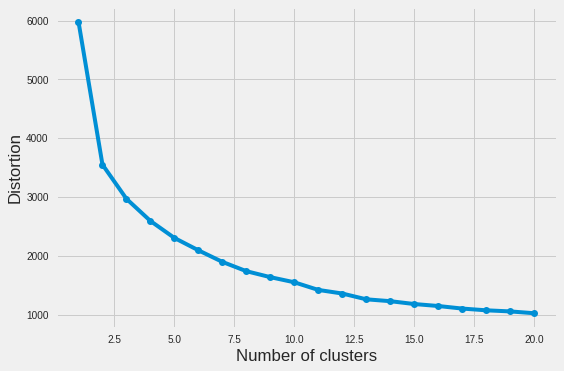

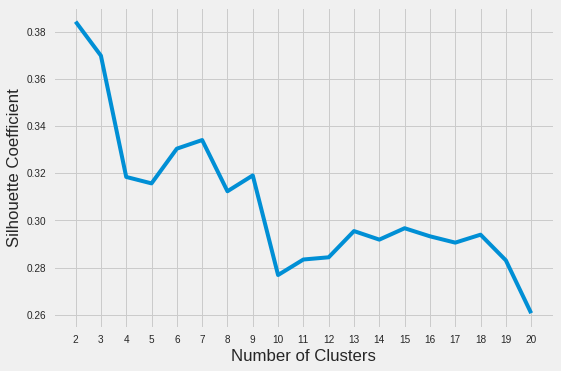

Estimated number of clusters: 2
Silhouette Coefficient: 0.384


In [14]:
#Creating a K-means model and checking its Metrics

from sklearn.cluster import KMeans

#Applying the Elbow Method to calculate distortion for a range of number of cluster

distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

#Plotting

plt.plot(range(1, 21), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

#Applying the Silhouette Method to interpret and validate of consistency within clusters of data

from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for j in range(2, 21):
    km = KMeans(n_clusters=j, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    silhouette_coefficients.append(score)

#Plotting

plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#Choosing number of clusters

n_clusters = 2
print('Estimated number of clusters: %d' % n_clusters)
km = KMeans(n_clusters=n_clusters)
km.fit(X_scaled)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, km.fit(X_scaled).labels_))

#Plotting chosen number of clusters
# ! pip install scikit-learn==0.23

# from yellowbrick.cluster import silhouette_visualizer
# silhouette_visualizer(KMeans(n_clusters=n_clusters, random_state=0), X_scaled)

#Visualizing clusters in the dataset
X_orig = pd.DataFrame(X_orig)
X_orig["cluster"] = km.labels_
X_orig.to_excel("model_km.xlsx")

In [15]:
print("Cluster 0")
X_orig.query("cluster == 0").describe(include="all")

Cluster 0


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,4911,"4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00","4,911.00"
unique,4911,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,C13137,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,"1,693.79",0.83,322.52,257.26,61.00,"1,318.64",0.16,0.09,0.07,0.18,4.32,3.12,"4,128.98","1,464.56",847.47,0.07,11.45,0.00
std,NaN,"2,047.61",0.27,862.02,761.69,248.54,"2,230.72",0.18,0.15,0.13,0.21,7.52,7.00,"3,335.06","2,563.59","2,073.28",0.19,1.40,0.00
min,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.04,0.00,6.00,0.00
25%,NaN,193.34,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,500.00",318.37,183.74,0.00,12.00,0.00
50%,NaN,"1,072.26",1.00,64.69,0.00,0.00,351.02,0.08,0.00,0.00,0.09,2.00,1.00,"3,000.00",679.79,413.04,0.00,12.00,0.00
75%,NaN,"2,270.79",1.00,349.06,229.00,20.36,"1,785.86",0.30,0.13,0.08,0.27,6.00,5.00,"6,000.00","1,543.55",864.21,0.00,12.00,0.00


In [16]:
print("Cluster 1")
X_orig.query("cluster == 1").describe(include="all")

Cluster 1


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,4039,"4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00","4,039.00"
unique,4039,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,C14949,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,"1,407.24",0.94,"1,818.95",999.97,831.25,554.32,0.89,0.34,0.73,0.08,1.95,28.81,"4,938.83","2,059.71",865.85,0.25,11.60,1.00
std,NaN,"2,111.66",0.16,"2,722.74","2,257.86","1,136.17","1,687.61",0.14,0.37,0.30,0.17,5.60,30.78,"3,931.51","3,223.23","2,323.21",0.35,1.25,0.00
min,NaN,0.00,0.00,8.40,0.00,0.00,0.00,0.42,0.00,0.00,0.00,0.00,0.00,300.00,0.00,0.02,0.00,6.00,1.00
25%,NaN,96.70,1.00,452.60,0.00,236.62,0.00,0.83,0.00,0.58,0.00,0.00,12.00,"1,800.00",500.18,165.88,0.00,12.00,1.00
50%,NaN,540.02,1.00,"1,004.98",249.00,493.82,0.00,1.00,0.17,0.83,0.00,0.00,18.00,"4,000.00","1,130.55",232.16,0.00,12.00,1.00
75%,NaN,"1,787.00",1.00,"2,189.91","1,180.11","1,029.48",144.18,1.00,0.67,1.00,0.08,1.00,34.00,"7,000.00","2,326.66",861.57,0.50,12.00,1.00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'TENURE Distribution')

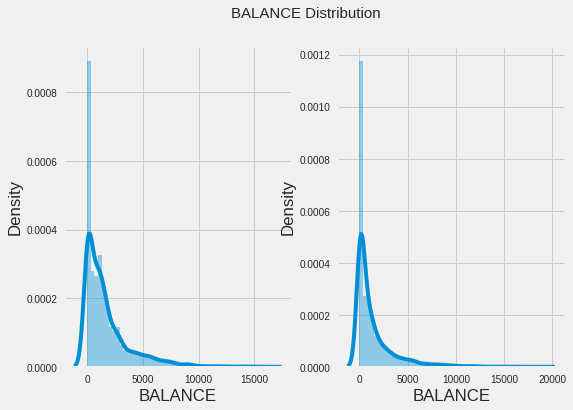

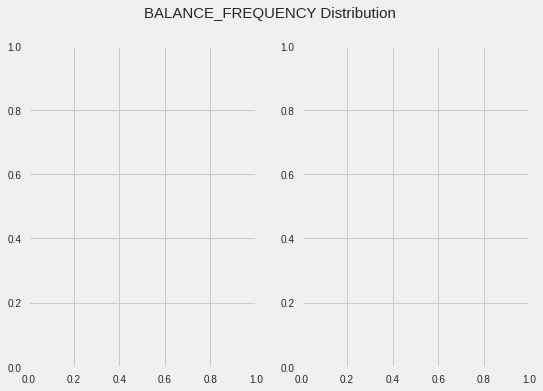

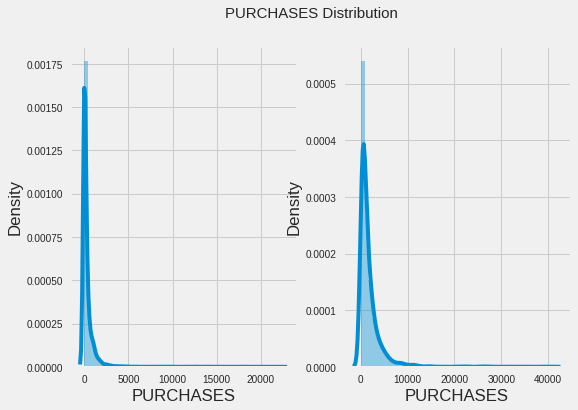

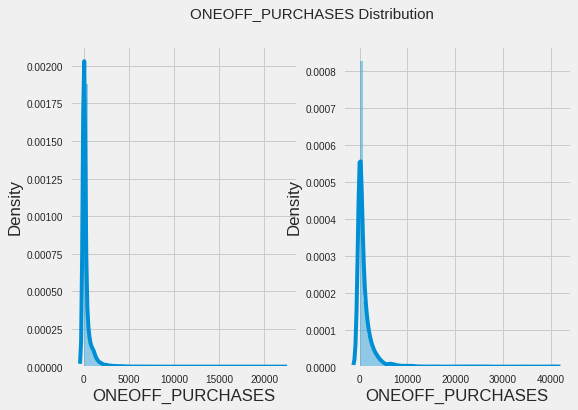

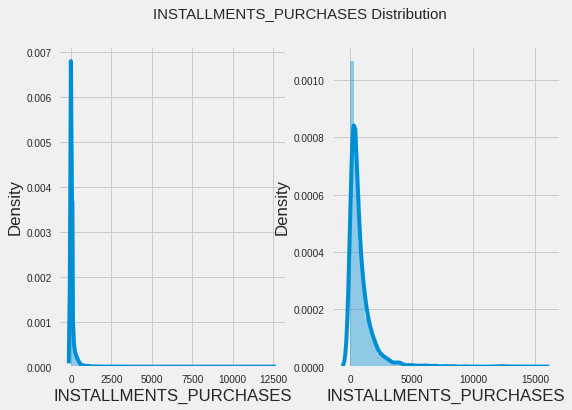

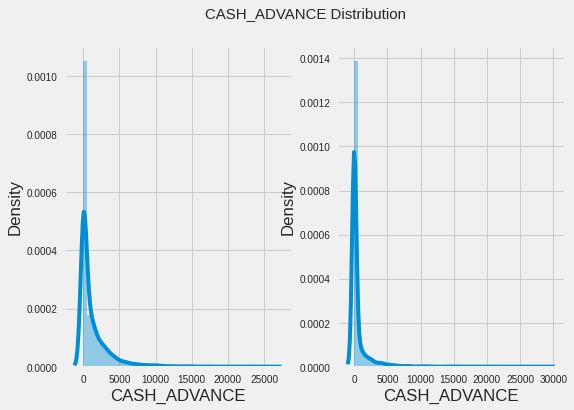

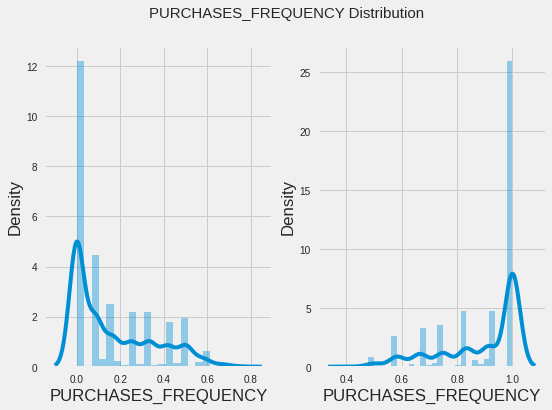

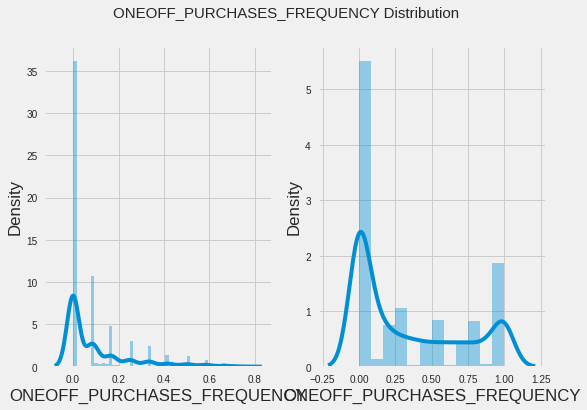

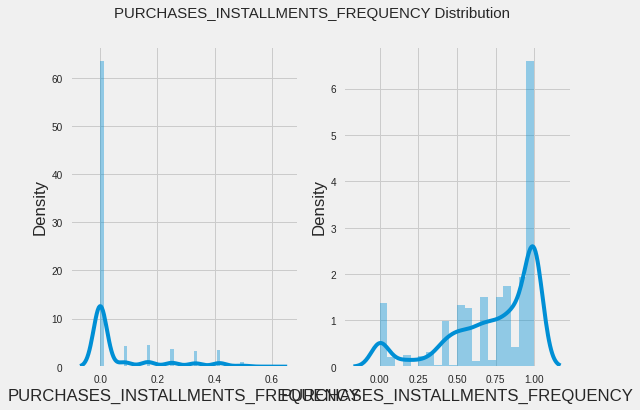

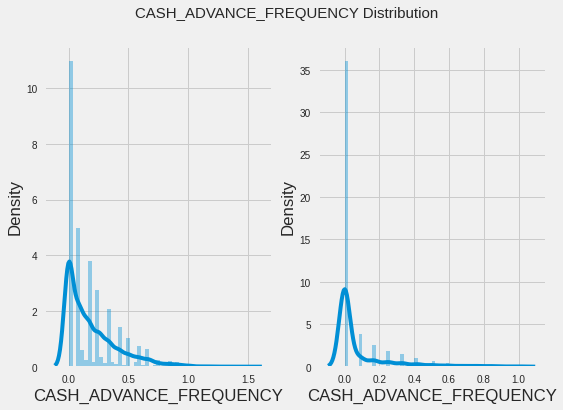

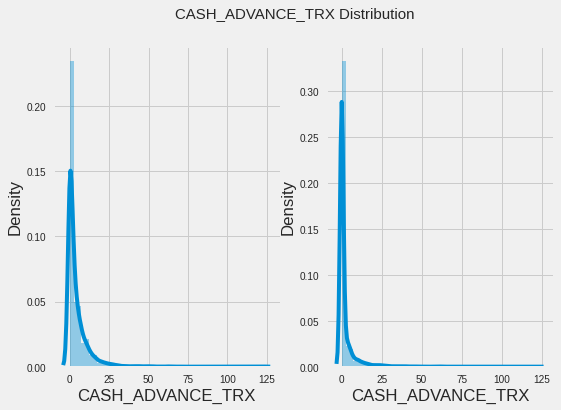

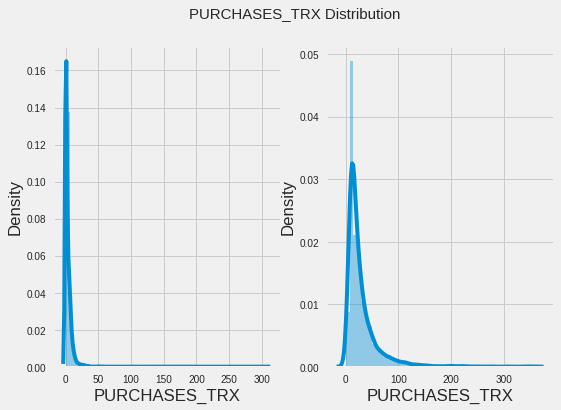

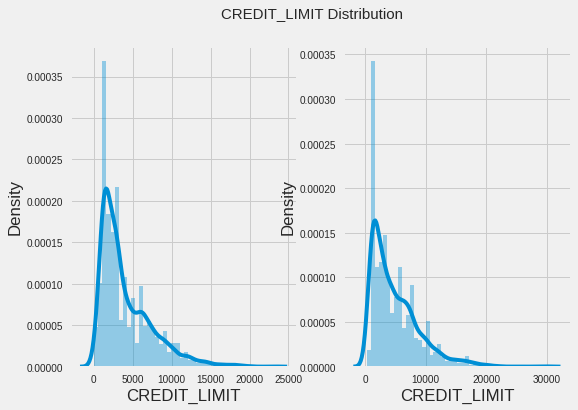

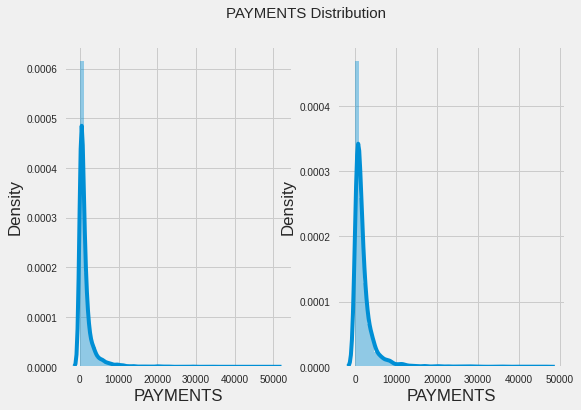

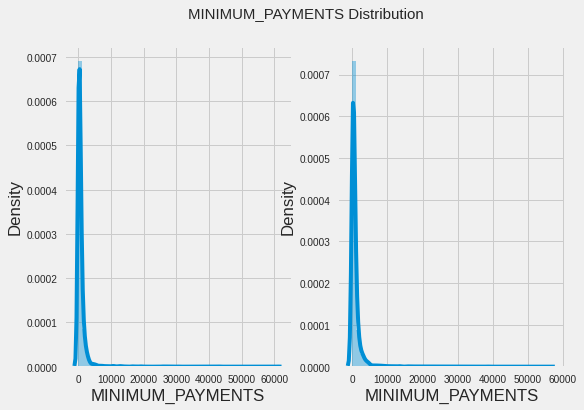

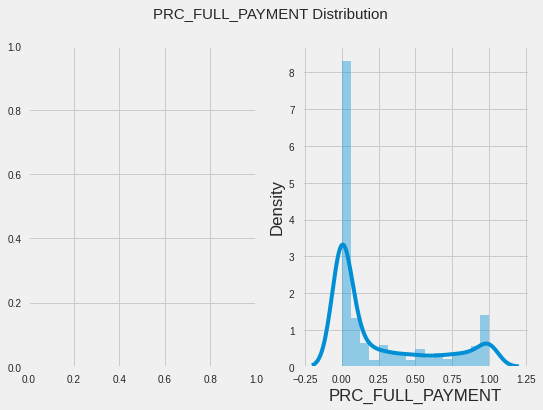

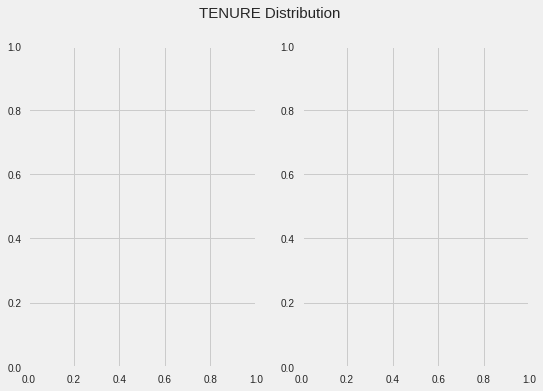

In [17]:
#Plotting Numerical Variables

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("BALANCE Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["BALANCE"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["BALANCE"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("BALANCE_FREQUENCY Distribution", fontsize=15)
# sns.distplot(X_orig.query("cluster == 0")["BALANCE_FREQUENCY"], label = "Cluster 0", ax=ax[0])
# sns.distplot(X_orig.query("cluster == 1")["BALANCE_FREQUENCY"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("PURCHASES Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["PURCHASES"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["PURCHASES"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("ONEOFF_PURCHASES Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["ONEOFF_PURCHASES"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["ONEOFF_PURCHASES"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("INSTALLMENTS_PURCHASES Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["INSTALLMENTS_PURCHASES"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["INSTALLMENTS_PURCHASES"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("CASH_ADVANCE Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["CASH_ADVANCE"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["CASH_ADVANCE"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("PURCHASES_FREQUENCY Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["PURCHASES_FREQUENCY"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["PURCHASES_FREQUENCY"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("ONEOFF_PURCHASES_FREQUENCY Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["ONEOFF_PURCHASES_FREQUENCY"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["ONEOFF_PURCHASES_FREQUENCY"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("PURCHASES_INSTALLMENTS_FREQUENCY Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["PURCHASES_INSTALLMENTS_FREQUENCY"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["PURCHASES_INSTALLMENTS_FREQUENCY"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("CASH_ADVANCE_FREQUENCY Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["CASH_ADVANCE_FREQUENCY"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["CASH_ADVANCE_FREQUENCY"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("CASH_ADVANCE_TRX Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["CASH_ADVANCE_TRX"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["CASH_ADVANCE_TRX"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("PURCHASES_TRX Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["PURCHASES_TRX"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["PURCHASES_TRX"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("CREDIT_LIMIT Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["CREDIT_LIMIT"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["CREDIT_LIMIT"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("PAYMENTS Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["PAYMENTS"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["PAYMENTS"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("MINIMUM_PAYMENTS Distribution", fontsize=15)
sns.distplot(X_orig.query("cluster == 0")["MINIMUM_PAYMENTS"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["MINIMUM_PAYMENTS"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("PRC_FULL_PAYMENT Distribution", fontsize=15)
# sns.distplot(X_orig.query("cluster == 0")["PRC_FULL_PAYMENT"], label = "Cluster 0", ax=ax[0])
sns.distplot(X_orig.query("cluster == 1")["PRC_FULL_PAYMENT"], label = "Cluster 1", ax=ax[1])

fig, ax = plt.subplots(1, len(X_orig["cluster"].unique()))
fig.suptitle("TENURE Distribution", fontsize=15)
# sns.distplot(X_orig.query("cluster == 0")["TENURE"], label = "Cluster 0", ax=ax[0])
# sns.distplot(X_orig.query("cluster == 1")["TENURE"], label = "Cluster 1", ax=ax[1])


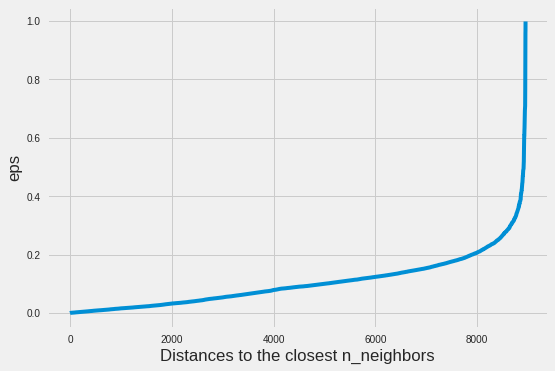

Estimated number of clusters: 3
Estimated number of noise points: 384
Silhouette Coefficient: 0.039


In [18]:
#Creating a DBSCAN model and checking its Metrics
#OBS: we´re exploring DBSCAN only as a study exercise in this project - we´ll adopt K-Means

from sklearn.neighbors import NearestNeighbors

#We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

#Soring and plotting results

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

from sklearn.cluster import DBSCAN

#Selecting the best eps (the optimal value for epsilon will be found at the point of maximum curvature)

dbs = DBSCAN(eps=0.3)
dbs.fit(X_scaled)

#The labels_ property contains the list of clusters and their respective points

clusters = dbs.labels_

from sklearn import metrics

#Number of clusters in labels, ignoring noise (outlier) (-1) if present

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, clusters))

#Visualizing clusters in the dataset
X_orig = pd.DataFrame(X_orig)
X_orig["cluster"] = dbs.labels_
X_orig.to_excel("model_dbs.xlsx")
